In [176]:
# Read the data
data <- read.csv('data_final.csv')
nrow(data)
# using library to read JSON format data
library(jsonlite)
install.packages('factoextra')
library(factoextra)

set.seed(123)

sample_size <- 3000
sample_index <- sample(seq_len(nrow(data)),size = sample_size)
trainingData <- data[sample_index,]
testData <- data[-sample_index,]
colnames(trainingData)

only <- c('revenue','budget')
target_df <- trainingData[only]
target_df$revenue <- log(target_df$revenue)

Final_dummy_df <- data.frame()



target_col <- colnames(trainingData)[3] # genres



colnames(trainingData)

library(dplyr)
library(stringr)
library(caret)
library(car)
library(tidyr)
library(ggpubr)
date_format <- c("year", "month", "day")
if (target_col == 'release_date'){
  trainingData[[target_col]] <- as.factor(trainingData[[target_col]])
  Split_df <- separate(trainingData[target_col], release_date ,sep="-", into = date_format)
  OBJ <-data.frame()
  OBJ <- cbind(trainingData[target_col],Split_df)
  for (col in date_format){
    OBJ[[col]]<- as.integer(OBJ[[col]])
  }
  # chagne month to season
  
  OBJ[which(OBJ$month > 11 | OBJ$month < 3 ), 'month'] <- -999
  
  OBJ[which(OBJ$month > 2 & OBJ$month < 6),'month'] <- 1
  
  OBJ[which(OBJ$month > 5 & OBJ$month < 9),'month'] <- 2
  
  OBJ[which(OBJ$month > 8 & OBJ$month < 12),'month'] <- 3
  
  OBJ[which(OBJ$month == -999 ), 'month'] <- 4
  colnames(OBJ) <- c('release_date','year','season','day')
  OBJ <- cbind(trainingData['revenue'],OBJ)
  OBJ$revenue <- log(OBJ$revenue)
  OBJ$season <- as.factor(OBJ$season)
  
  ggboxplot(OBJ, x = "season", y = "revenue", 
            order = c("1", "2", "3","4"),
            ylab = "revenue", xlab = "season",ylim = c(12.5,21.748578))
  res.aov <- aov(revenue ~ season, data = OBJ)
  print(summary(res.aov))
  # Extract the residuals
  aov_residuals <- residuals(object = res.aov )
  # Run Shapiro-Wilk test
  plot(res.aov, 2)
  print(shapiro.test(x = aov_residuals ))
  leveneTest(revenue ~ season, data = OBJ)
  kruskal.test(revenue ~ season, data = OBJ)
  
}


# summary
revenue <- data[colnames(data)[1]]
revenue$revenue <- log(revenue$revenue)
budget <- data[colnames(data)[2]]
summary(revenue,digits=10)


library(ggplot2)
#plot(y = revenue$revenue, x= budget$budget /1000000,xlab = 'budget (milions)', ylab = 'Log(revenue($))',main = 'The plot of budget against log(revenue)')
#plot(y = revenue$revenue, x= OBJ$year ,xlab = 'Year', ylab = 'Log(revenue($))',main = 'The plot of year against log(revenue)')
#reg1 <- lm(revenue$revenue ~ as.numeric(OBJ$year) )
#abline(reg1,col="red",lwd=3)



[1] 3376

Installing package into 'C:/Users/ivywa/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'factoextra' is in use and will not be installed"

[1] "revenue"              "budget"               "genres"              
[4] "keywords"             "production_companies" "release_date"        
[7] "cast"                 "crew"

[1] "revenue"              "budget"               "genres"              
[4] "keywords"             "production_companies" "release_date"        
[7] "cast"                 "crew"

    revenue         
 Min.   : 1.609438  
 1st Qu.:16.546813  
 Median :17.761970  
 Mean   :17.385960  
 3rd Qu.:18.758332  
 Max.   :21.748578  

In [177]:

###############################################################################################

response = 'revenue'
target <- fromJSON(toJSON(trainingData[[target_col]]))
###############################################################################################


In [178]:

genres_target_dict_df<- data.frame()
add <- TRUE
loop <- 1
while(add){
  
  obs <- fromJSON(target[loop])
  
  if (class(obs) == 'data.frame'){
    genres_target_dict_df <- obs
    add <- FALSE
  }
  loop<- loop + 1
}
# to obtain column name
for (i in seq(1,length(target))){
  df_i <- fromJSON(target[i])
  if (class(df_i) == 'data.frame'){ #missing coloumn
    genres_target_dict_df = union(genres_target_dict_df,df_i)
  }
}
head(genres_target_dict_df,5)





#genres
display = target_col
colname <- c(target_col,'Type') #
colnames(genres_target_dict_df) <- colname


genres_target_dict_df[[target_col]] <- as.factor(genres_target_dict_df[[target_col]])

print(genres_target_dict_df[[target_col]])
dummy_var <-dummyVars(~ Type ,data = genres_target_dict_df) # change

trsf <- data.frame(predict(dummy_var, newdata = genres_target_dict_df))

#col name
genres_colnames_vector <- colnames(trsf)
genres_colnames_vector <- sub("\\.", "", genres_colnames_vector) #
dummycol <- data.frame(matrix(0, nrow = nrow(trainingData), ncol = length(genres_colnames_vector), dimnames = list(NULL, paste0("ColumnName_", 1:length(genres_colnames_vector)))))
colnames(dummycol) <- genres_colnames_vector
for (j in seq(1,length(target))){
  
  df_j <- fromJSON(target[j])
  if (class(df_j) == 'data.frame'){
    #id sequence
    colnames(df_j) <- colname
    fill_colname <- rep('Type',length(df_j$Type)) #change
    fill_colname <- paste(fill_colname,sub(" ", "",df_j$Type),sep = '') #
    dummycol[j,fill_colname]<-1
  }
  
}
dummycol

target_df <- cbind(target_df,dummycol)


id,name
18,Drama
28,Action
27,Horror
9648,Mystery
53,Thriller


 [1] 18    28    27    9648  53    14    12    35    16    10751 878   10749
[13] 36    80    10402 10752 99    37    10769
19 Levels: 12 14 16 18 27 28 35 36 37 53 80 99 878 9648 10402 10749 ... 10769


TypeAction,TypeAdventure,TypeAnimation,TypeComedy,TypeCrime,TypeDocumentary,TypeDrama,TypeFamily,TypeFantasy,TypeForeign,TypeHistory,TypeHorror,TypeMusic,TypeMystery,TypeRomance,TypeScienceFiction,TypeThriller,TypeWar,TypeWestern
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


[1] "revenue"              "budget"               "genres"              
[4] "keywords"             "production_companies" "release_date"        
[7] "cast"                 "crew"

              Df Sum Sq Mean Sq F value   Pr(>F)    
season         3    164   54.57   11.01 3.47e-07 ***
Residuals   2996  14854    4.96                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.82255, p-value < 2.2e-16




	Kruskal-Wallis rank sum test

data:  revenue by season
Kruskal-Wallis chi-squared = 43.781, df = 3, p-value = 1.68e-09


,revenue,release_date,year,season,day
2463,2.397895,1978-04-26,1978,1,26
2511,17.977333,2016-01-22,2016,4,22
2227,16.653429,1984-05-11,1984,1,11
526,17.750130,2003-06-09,2003,2,9
195,19.589712,2010-10-28,2010,3,28


,revenue,budget,TypeAction,TypeAdventure,TypeAnimation,TypeComedy,TypeCrime,TypeDocumentary,TypeDrama,TypeFamily,...,TypeHorror,TypeMusic,TypeMystery,TypeRomance,TypeScienceFiction,TypeThriller,TypeWar,TypeWestern,year,season
2463,2.397895,11,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1978,1
2511,17.977333,10000000,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,2016,4
2227,16.653429,15000000,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1984,1
526,17.750130,75000000,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,2003,2
195,19.589712,130000000,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,2010,3


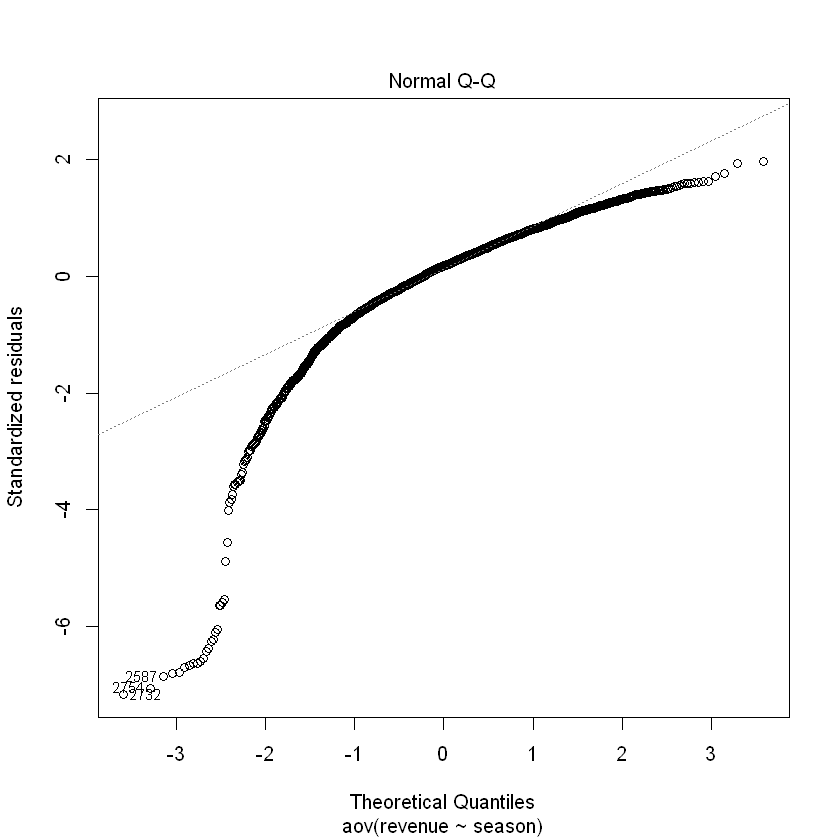

In [179]:
##################################### DATE ###########################
target_col <- colnames(trainingData)[6]

colnames(trainingData)

library(dplyr)
library(stringr)
library(caret)
library(car)
library(tidyr)
library(ggpubr)
date_format <- c("year", "month", "day")
if (target_col == 'release_date'){
  trainingData[[target_col]] <- as.factor(trainingData[[target_col]])
  Split_df <- separate(trainingData[target_col], release_date ,sep="-", into = date_format)
  OBJ <-data.frame()
  OBJ <- cbind(trainingData[target_col],Split_df)
  for (col in date_format){
    OBJ[[col]]<- as.integer(OBJ[[col]])
  }
  # chagne month to season
  
  OBJ[which(OBJ$month > 11 | OBJ$month < 3 ), 'month'] <- -999
  
  OBJ[which(OBJ$month > 2 & OBJ$month < 6),'month'] <- 1
  
  OBJ[which(OBJ$month > 5 & OBJ$month < 9),'month'] <- 2
  
  OBJ[which(OBJ$month > 8 & OBJ$month < 12),'month'] <- 3
  
  OBJ[which(OBJ$month == -999 ), 'month'] <- 4
  colnames(OBJ) <- c('release_date','year','season','day')
  OBJ <- cbind(trainingData['revenue'],OBJ)
  OBJ$revenue <- log(OBJ$revenue)
  OBJ$season <- as.factor(OBJ$season)
  
  ggboxplot(OBJ, x = "season", y = "revenue", 
            order = c("1", "2", "3","4"),
            ylab = "revenue", xlab = "season",ylim = c(12.5,21.748578))
  res.aov <- aov(revenue ~ season, data = OBJ)
  print(summary(res.aov))
  # Extract the residuals
  aov_residuals <- residuals(object = res.aov )
  # Run Shapiro-Wilk test
  plot(res.aov, 2)
  print(shapiro.test(x = aov_residuals ))
  leveneTest(revenue ~ season, data = OBJ)
  kruskal.test(revenue ~ season, data = OBJ)
  
}

# add target_df
head(OBJ, 5)
target_df <- cbind(target_df,OBJ[c('year','season')])
head(target_df,5)

In [180]:
##################################### company ###########################
target_col <- colnames(trainingData)[5]

# company 
library(data.table)
#q <- boxplot(revenue ~ TypeDocumentary,target_df,col=c('white',"red"),cex.axis=2,cex.lab=2.0)
#q <- boxplot(revenue ~ TypeAnimation,target_df,col=c('white',"blue"),cex.axis=2,cex.lab=2.0)
#q <- boxplot(revenue ~ TypeAdventure,target_df,col=c('white',"green"),cex.axis=2,cex.lab=2.0)
target <- fromJSON(toJSON(trainingData[[target_col]]))

company_target_dict_df<- data.frame

add <- TRUE
loop <- 1
while(add){
  
  obs <- fromJSON(target[loop])
  
  if (class(obs) == 'data.frame'){
    company_target_dict_df <- obs
    add <- FALSE
  }
  loop<- loop + 1
}
# to obtain column name
for (i in seq(1,length(target))){
  df_i <- fromJSON(target[i])
  if (class(df_i) == 'data.frame'){ #missing coloumn
    company_target_dict_df = union(company_target_dict_df,df_i)
  }
}

# check mean renvue in each genres
colname_genres = colnames(dummycol)
mean_genres_df <- data.frame()
response <- 'revenue'
for (sub_col in colname_genres){
  index <- which(dummycol[[sub_col]] == 1)
  sub_mean <-mean(target_df[index,response])
  mean_genres_df <- rbind(mean_genres_df,data.frame(name = sub_col, mean = sub_mean))
}
# check the revenue of company in each genres


test_df <- target_df
target_col <- colnames(trainingData)
target_col <- colnames(trainingData)[5]
target <- fromJSON(toJSON(trainingData[[target_col]]))
count_matrix <- data.frame(matrix(0, nrow = nrow(company_target_dict_df),ncol = 2))
colnames(count_matrix) <- c('above','below')
company_target_dict_df <- cbind(company_target_dict_df,count_matrix)

for (l in seq(1,length(target))){
  df_l <- fromJSON(target[l])
  revenue_l <- test_df[l,response] # subtract revenue
  #find type of movies
  index_col_l<- which(test_df[l,] == 1)
  col_l <- names(target_df)[index_col_l]
  #
  # find movie mean revenue
  movie_mean <- mean_genres_df[which(mean_genres_df[['name']] %in% col_l),'mean']
  # logical determinator for above and below
  deter <- (movie_mean < revenue_l) # 
  
  count_above_l <- sum(deter)
  count_below_l <- length(deter) - count_above_l
  
  #find company name
  company_names <- df_l[['name']]
  company_index <- which(company_target_dict_df[['name']] %in% company_names)
  company_target_dict_df[company_index,'above'] <- company_target_dict_df[company_index,'above'] + count_above_l
  company_target_dict_df[company_index,'below'] <- company_target_dict_df[company_index,'below'] + count_below_l
}

company_target_dict_df <- cbind(company_target_dict_df,data.frame(ratio = rep(0,nrow(company_target_dict_df)))) #ratio
company_target_dict_df$ratio <- company_target_dict_df$above / (company_target_dict_df$above + company_target_dict_df$below)

# statistics
#d <- density(company_target_dict_df$ratio) # returns the density data
#plot(d) # plots the results
#hist(company_target_dict_df$ratio, breaks=10, col="red")
company_target_dict_df[which(company_target_dict_df[['ratio']] >= 0.75),'ratio'] <- 4
company_target_dict_df[which(company_target_dict_df[['ratio']] < 0.25),'ratio'] <- 1
company_target_dict_df[which(company_target_dict_df[['ratio']] >= 0.25 & company_target_dict_df[['ratio']] < 0.5),'ratio'] <- 2 
company_target_dict_df[which(company_target_dict_df[['ratio']] >= 0.5 & company_target_dict_df[['ratio']] < 0.75),'ratio'] <- 3
company_target_dict_df[which(company_target_dict_df[['ratio']] == 'NaN'),'ratio'] <- 5
summary(company_target_dict_df)
names(company_target_dict_df)[names(company_target_dict_df) == "ratio"] <- "company"

company_target_dict_df[['company']] <- as.factor(company_target_dict_df[['company']])
summary(company_target_dict_df[['company']])
dummy_var <- dummyVars( ~ company ,data = company_target_dict_df,sep = '') # change
trsf <- data.frame(predict(dummy_var, newdata = company_target_dict_df))
#col name
company_colnames_vector <- colnames(trsf)
company_colnames_vector <- sub("\\.", "", company_colnames_vector) #
dummycol <- data.frame(matrix(0, nrow = nrow(trainingData), ncol = length(company_colnames_vector), dimnames = list(NULL, paste0("ColumnName_", 1:length(company_colnames_vector)))))
colnames(dummycol) <- colnames(trsf)
for (j in seq(1,length(target))){
  df_j <- fromJSON(target[j])
  if (class(df_j) == 'data.frame'){
    #id sequence
    colnames(df_j) <- c('company','id')
    fill_colname <- rep('company',length(df_j$company)) #change
    # company to group number
    vector <- company_target_dict_df[which(df_j[['company']]  %in% company_target_dict_df[['name']]),   'company'  ]
    fill_colname <- paste(fill_colname,sub(" ", "",vector),sep = '') #
    c1 <- length (which(fill_colname == colnames(dummycol)[1]))
    c2 <- length (which(fill_colname == colnames(dummycol)[2]))
    c3 <- length (which(fill_colname == colnames(dummycol)[3]))
    c4 <- length (which(fill_colname == colnames(dummycol)[4]))
    
    dummycol[j,colnames(dummycol)[1]]<- c1
    dummycol[j,colnames(dummycol)[2]]<- c2
    dummycol[j,colnames(dummycol)[3]]<- c3
    dummycol[j,colnames(dummycol)[4]]<- c4
  }
}
sum(dummycol$company1)
sum(dummycol$company2)
sum(dummycol$company3)
sum(dummycol$company4)

     name                 id            above            below        
 Length:3468        Min.   :    1   Min.   :  0.00   Min.   :  0.000  
 Class :character   1st Qu.: 2980   1st Qu.:  0.00   1st Qu.:  0.000  
 Mode  :character   Median :11084   Median :  2.00   Median :  2.000  
                    Mean   :19519   Mean   :  4.71   Mean   :  2.736  
                    3rd Qu.:24048   3rd Qu.:  3.00   3rd Qu.:  3.000  
                    Max.   :95063   Max.   :515.00   Max.   :214.000  
     ratio      
 Min.   :1.000  
 1st Qu.:1.000  
 Median :3.000  
 Mean   :2.591  
 3rd Qu.:4.000  
 Max.   :4.000  

1    2    3    4 
1289  274  473 1432

[1] 2411

[1] 11

[1] 5061

[1] 2082

In [181]:
target_df<- cbind(target_df,dummycol)
head(target_df,5)

,revenue,budget,TypeAction,TypeAdventure,TypeAnimation,TypeComedy,TypeCrime,TypeDocumentary,TypeDrama,TypeFamily,...,TypeScienceFiction,TypeThriller,TypeWar,TypeWestern,year,season,company1,company2,company3,company4
2463,2.397895,11,1,0,0,0,0,0,1,0,...,0,0,0,0,1978,1,1,0,1,0
2511,17.977333,10000000,0,0,0,0,0,0,0,0,...,0,1,0,0,2016,4,1,0,2,2
2227,16.653429,15000000,1,0,0,0,0,0,1,0,...,0,1,0,0,1984,1,1,0,1,0
526,17.750130,75000000,1,1,0,1,0,0,0,0,...,0,1,0,0,2003,2,1,0,1,0
195,19.589712,130000000,1,0,1,1,0,0,0,1,...,1,0,0,0,2010,3,0,0,1,0


In [182]:
##################################### keywords ###########################
target_col <- colnames(trainingData)[4]
target <- fromJSON(toJSON(trainingData[[target_col]]))
#-----------------------------------------------------------------------------------------------------------------#
# keywords
keywords_target_dict_df<- data.frame()
add <- TRUE
loop <- 1
while(add){
  
  obs <- fromJSON(target[loop])
  
  if (class(obs) == 'data.frame'){
    keywords_target_dict_df <- obs
    add <- FALSE
  }
  loop<- loop + 1
}
# to obtain column name
for (i in seq(1,length(target))){
  
  df_i <- fromJSON(target[i])
  if (class(df_i) == 'data.frame'){ #missing coloumn
    keywords_target_dict_df = union(keywords_target_dict_df,df_i)
  }
}

head(keywords_target_dict_df,5)

id,name
236,suicide
392,england
657,fire
1655,country house
1879,shower


In [183]:
# keywords 
test_df <- target_df
target_col <- colnames(trainingData)
target_col <- colnames(trainingData)[4]
target <- fromJSON(toJSON(trainingData[[target_col]]))
count_matrix <- data.frame(matrix(0, nrow = nrow(keywords_target_dict_df),ncol = 3))
colnames(count_matrix) <- c('meanBudget','meanLogRevenue','Count')
keywords_target_dict_df <- cbind(keywords_target_dict_df,count_matrix)
head(keywords_target_dict_df,5)
for (r in seq(1,nrow(test_df))){
  df_r <- fromJSON(target[r])
  revenue_r <- test_df[r,response] # subtract revenue
  
  #find type of movies
  variables <- test_df[r,c('revenue','budget')]
  #find company name
  key_names <- df_r[['name']]
  if (class(key_names) == "character") {
    key_index <- which(keywords_target_dict_df[['name']] %in% key_names)
    keywords_target_dict_df[key_index,'meanBudget'] <- keywords_target_dict_df[key_index,'meanBudget'] + variables$budget
    keywords_target_dict_df[key_index,'meanLogRevenue'] <- keywords_target_dict_df[key_index,'meanLogRevenue'] + variables$revenue
    keywords_target_dict_df[key_index,'Count'] <- keywords_target_dict_df[key_index,'Count'] + 1
  }
}
keywords_target_dict_df[['meanBudget']]<- keywords_target_dict_df[['meanBudget']] / keywords_target_dict_df[['Count']]
keywords_target_dict_df[['meanLogRevenue']]<- keywords_target_dict_df[['meanLogRevenue']] / keywords_target_dict_df[['Count']]

library(stats)
K_mean_df <- keywords_target_dict_df[c('meanBudget','meanLogRevenue')]
K_mean_matrix <- data.matrix(K_mean_df)
set.seed(123)

id,name,meanBudget,meanLogRevenue,Count
236,suicide,0,0,0
392,england,0,0,0
657,fire,0,0,0
1655,country house,0,0,0
1879,shower,0,0,0


[1] "\n# plot \nset.seed(123)\n\nfviz_nbclust(K_mean_matrix, kmeans, method = \"wss\")\n"

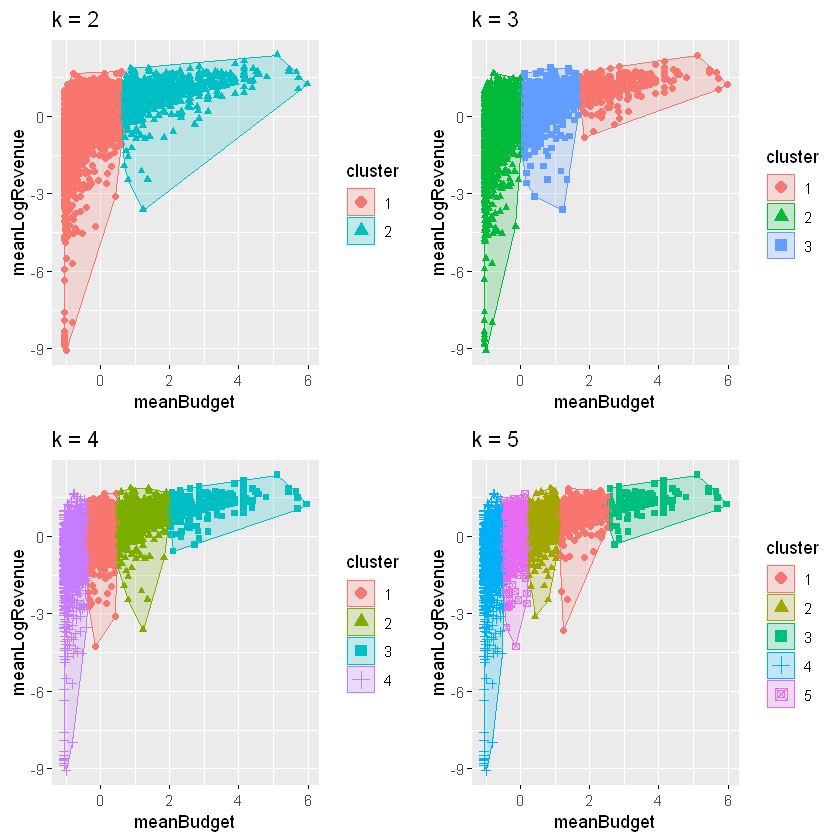

In [184]:
k2 <- kmeans(K_mean_matrix, centers = 2, nstart = 25)
k3 <- kmeans(K_mean_matrix, centers = 3, nstart = 25)
k4 <- kmeans(K_mean_matrix, centers = 4, nstart = 25)
k5 <- kmeans(K_mean_matrix, centers = 5, nstart = 25)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = K_mean_matrix) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = K_mean_matrix) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = K_mean_matrix) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = K_mean_matrix) + ggtitle("k = 5")


library(gridExtra)
grid.arrange(p1, p2, p3, p4, nrow = 2)
'
# plot 
set.seed(123)

fviz_nbclust(K_mean_matrix, kmeans, method = "wss")
'

In [185]:
KK <- kmeans(K_mean_matrix,centers = 3,  iter.max = 20, nstart = 1)
keywords_reference_dict_df <- cbind(keywords_target_dict_df,data.frame(level = KK$cluster) ) #no need for twice
# keywords
head(keywords_reference_dict_df,10)
keywords_reference_dict_df[['level']] <- as.factor(keywords_reference_dict_df[['level']])
dummy_var <- dummyVars( ~ level ,data = keywords_reference_dict_df,sep = '') # change
trsf_keywords <- data.frame(predict(dummy_var, newdata = keywords_reference_dict_df))

#col name
keywords_colnames_vector <- colnames(trsf_keywords)
keywords_colnames_vector <- sub("\\.", "", keywords_colnames_vector) #
dummycol <- data.frame(matrix(0, nrow = nrow(trainingData), ncol = length(keywords_colnames_vector), dimnames = list(NULL, paste0("ColumnName_", 1:length(keywords_colnames_vector)))))
colnames(dummycol) <- colnames(trsf_keywords)
for (t in seq(1,nrow(test_df))){
    df_t <- fromJSON(target[t])
    if (class(df_t) == 'data.frame'){
        #id sequence
        colnames(df_t) <- c('id','name')
        fill_colname <- rep('level',length(df_t$name)) #change
        # company to group number
        vector <- keywords_reference_dict_df[which(keywords_reference_dict_df[['name']] %in% df_t[['name']]),   'level'  ] ######
        fill_colname <- paste(fill_colname,sub(" ", "",vector),sep = '') #
        c1 <- length (which(fill_colname == colnames(dummycol)[1]))
        c2 <- length (which(fill_colname == colnames(dummycol)[2]))
        c3 <- length (which(fill_colname == colnames(dummycol)[3]))
        dummycol[t,colnames(dummycol)[1]]<- c1
        dummycol[t,colnames(dummycol)[2]]<- c2
        dummycol[t,colnames(dummycol)[3]]<- c3
        }
    
}
head(dummycol,5)

id,name,meanBudget,meanLogRevenue,Count,level
236,suicide,27951358,16.82973,37,3
392,england,29841129,18.20438,25,3
657,fire,51959991,17.80522,15,2
1655,country house,28575000,17.73732,4,3
1879,shower,3872421,16.74864,7,3
2341,nanny,20200000,18.23211,9,3
2546,mask,39136364,17.90384,11,2
5202,boy,59145455,17.86903,11,2
9826,murder,28836537,16.88304,133,3
12545,mansion,15000000,18.30265,3,3


level1,level2,level3
0,0,0
0,4,12
0,3,1
0,0,2
3,12,2


In [186]:
target_df<- cbind(target_df,dummycol)
target_df[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14),]

,revenue,budget,TypeAction,TypeAdventure,TypeAnimation,TypeComedy,TypeCrime,TypeDocumentary,TypeDrama,TypeFamily,...,TypeWestern,year,season,company1,company2,company3,company4,level1,level2,level3
2463,2.397895,11,1,0,0,0,0,0,1,0,...,0,1978,1,1,0,1,0,0,0,0
2511,17.977333,10000000,0,0,0,0,0,0,0,0,...,0,2016,4,1,0,2,2,0,4,12
2227,16.653429,15000000,1,0,0,0,0,0,1,0,...,0,1984,1,1,0,1,0,0,3,1
526,17.750130,75000000,1,1,0,1,0,0,0,0,...,0,2003,2,1,0,1,0,0,0,2
195,19.589712,130000000,1,0,1,1,0,0,0,1,...,0,2010,3,0,0,1,0,3,12,2
2986,16.410911,4000000,0,0,0,1,0,0,1,0,...,0,2006,3,1,0,2,0,0,1,12
1842,17.509943,32000000,0,0,0,1,0,0,0,0,...,0,2001,3,1,0,2,1,0,0,1
1142,18.119576,36000000,0,0,0,0,0,0,1,0,...,0,1997,4,0,0,1,0,1,2,5
1253,16.343858,36000000,0,0,0,0,0,0,0,0,...,0,1997,3,1,0,1,0,0,8,10
1268,19.021164,35000000,0,0,0,0,1,0,0,0,...,0,1991,3,1,0,2,1,0,4,8


In [187]:
#########################################testing data ####################################
only <- c('revenue','budget')
tesing_target_df <- testData[only]
tesing_target_df$revenue <- log(tesing_target_df$revenue)

Final_dummy_df <- data.frame()


####################################genres############################################
target_col <- colnames(testData)[3] # genres

library(ggplot2)
#plot(y = revenue$revenue, x= budget$budget /1000000,xlab = 'budget (milions)', ylab = 'Log(revenue($))',main = 'The plot of budget against log(revenue)')
#plot(y = revenue$revenue, x= OBJ$year ,xlab = 'Year', ylab = 'Log(revenue($))',main = 'The plot of year against log(revenue)')
#reg1 <- lm(revenue$revenue ~ as.numeric(OBJ$year) )
#abline(reg1,col="red",lwd=3)

In [188]:
###############################################################################################

response = 'revenue'
target <- fromJSON(toJSON(testData[[target_col]]))
################################genres###############################################################

#col name
dummycol <- data.frame(matrix(0, nrow = nrow(testData), ncol = length(genres_colnames_vector), dimnames = list(NULL, paste0("ColumnName_", 1:length(genres_colnames_vector)))))
colnames(dummycol) <- genres_colnames_vector
for (j in seq(1,length(target))){
  
  df_j <- fromJSON(target[j])
  if (class(df_j) == 'data.frame'){
    #id sequence
    colnames(df_j) <- colname
    fill_colname <- rep('Type',length(df_j$Type)) #change
    fill_colname <- paste(fill_colname,sub(" ", "",df_j$Type),sep = '') #
    dummycol[j,fill_colname]<-1
  }
  
}
nrow(dummycol)

tesing_target_df <- cbind(tesing_target_df,dummycol)

[1] 376

             Df Sum Sq Mean Sq F value Pr(>F)   
season        3   45.7  15.230   4.394 0.0047 **
Residuals   372 1289.4   3.466                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.93522, p-value = 1.011e-11




	Kruskal-Wallis rank sum test

data:  revenue by season
Kruskal-Wallis chi-squared = 19.842, df = 3, p-value = 0.000183


,revenue,release_date,year,season,day
3,20.59620,2015-10-26,2015,3,26
14,18.30740,2013-07-03,2013,2,3
22,19.55424,2010-05-12,2010,1,12
43,20.78809,2010-06-16,2010,2,16
47,20.43273,2014-05-15,2014,1,15


,revenue,budget,TypeAction,TypeAdventure,TypeAnimation,TypeComedy,TypeCrime,TypeDocumentary,TypeDrama,TypeFamily,...,TypeForeign,TypeHistory,TypeHorror,TypeMusic,TypeMystery,TypeRomance,TypeScienceFiction,TypeThriller,TypeWar,TypeWestern
3,20.59620,245000000,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,18.30740,255000000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22,19.55424,200000000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,20.78809,200000000,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
47,20.43273,250000000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


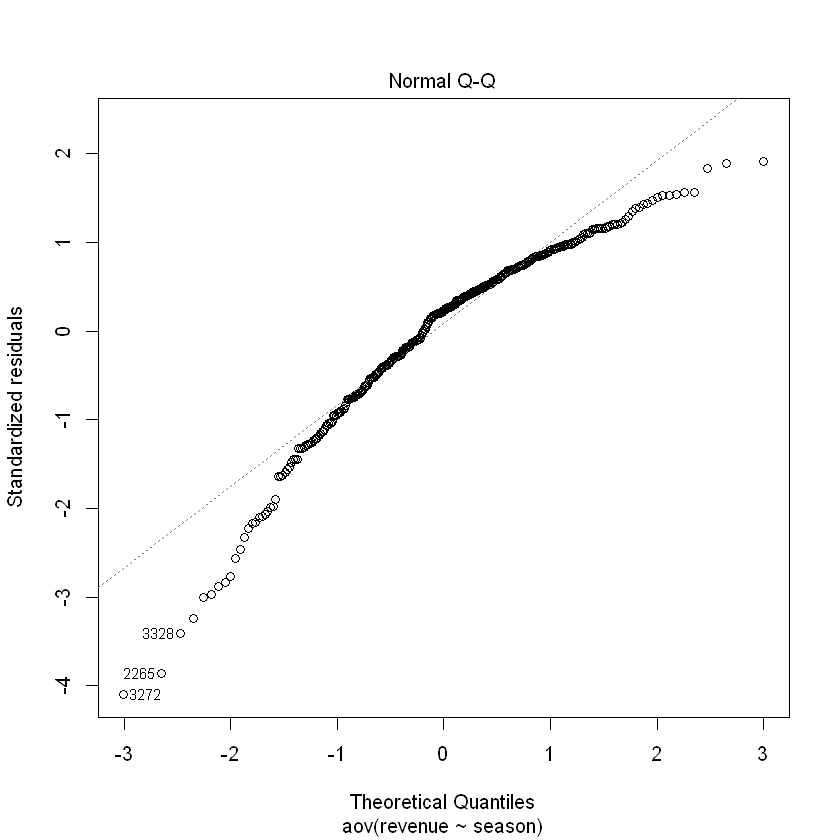

In [189]:
##################################### DATE ###########################
target_col <- colnames(testData)[6]

date_format <- c("year", "month", "day")
if (target_col == 'release_date'){
  testData[[target_col]] <- as.factor(testData[[target_col]])
  Split_df <- separate(testData[target_col], release_date ,sep="-", into = date_format)
  OBJ <-data.frame() # clean
  OBJ <- cbind(testData[target_col],Split_df)
  for (col in date_format){
    OBJ[[col]]<- as.integer(OBJ[[col]])
  }
  # chagne month to season
  
  OBJ[which(OBJ$month > 11 | OBJ$month < 3 ), 'month'] <- -999
  
  OBJ[which(OBJ$month > 2 & OBJ$month < 6),'month'] <- 1
  
  OBJ[which(OBJ$month > 5 & OBJ$month < 9),'month'] <- 2
  
  OBJ[which(OBJ$month > 8 & OBJ$month < 12),'month'] <- 3
  
  OBJ[which(OBJ$month == -999 ), 'month'] <- 4
  colnames(OBJ) <- c('release_date','year','season','day')
  OBJ <- cbind(testData['revenue'],OBJ)
  OBJ$revenue <- log(OBJ$revenue)
  OBJ$season <- as.factor(OBJ$season)
  
  ggboxplot(OBJ, x = "season", y = "revenue", 
            order = c("1", "2", "3","4"),
            ylab = "revenue", xlab = "season",ylim = c(12.5,21.748578))
  res.aov <- aov(revenue ~ season, data = OBJ)
  print(summary(res.aov))
  # Extract the residuals
  aov_residuals <- residuals(object = res.aov )
  # Run Shapiro-Wilk test
  plot(res.aov, 2)
  print(shapiro.test(x = aov_residuals ))
  leveneTest(revenue ~ season, data = OBJ)
  kruskal.test(revenue ~ season, data = OBJ)
  
}

# add tesing_target_df
head(OBJ, 5)
head(tesing_target_df,5)
tesing_target_df <- cbind(tesing_target_df,OBJ[c('year','season')])


In [190]:
##################################### company ###########################
target_col <- colnames(testData)[5]

# company 
library(data.table)
#q <- boxplot(revenue ~ TypeDocumentary,tesing_target_df,col=c('white',"red"),cex.axis=2,cex.lab=2.0)
#q <- boxplot(revenue ~ TypeAnimation,tesing_target_df,col=c('white',"blue"),cex.axis=2,cex.lab=2.0)
#q <- boxplot(revenue ~ TypeAdventure,tesing_target_df,col=c('white',"green"),cex.axis=2,cex.lab=2.0)
target_col <- colnames(testData)[5]
target <- fromJSON(toJSON(testData[[target_col]]))
company_target_dict_df
dummy_var <- dummyVars( ~ company ,data = company_target_dict_df,sep = '') # change
trsf <- data.frame(predict(dummy_var, newdata = company_target_dict_df))
#col name
company_colnames_vector <- colnames(trsf)
company_colnames_vector <- sub("\\.", "", company_colnames_vector) #
dummycol <- data.frame(matrix(0, nrow = nrow(testData), ncol = length(company_colnames_vector), dimnames = list(NULL, paste0("ColumnName_", 1:length(company_colnames_vector)))))
colnames(dummycol) <- colnames(trsf)
for (j in seq(1,length(target))){
  df_j <- fromJSON(target[j])
  if (class(df_j) == 'data.frame'){
    #id sequence
    colnames(df_j) <- c('company','id')
    fill_colname <- rep('company',length(df_j$company)) #change
    # company to group number
    vector <- company_target_dict_df[which(df_j[['company']]  %in% company_target_dict_df[['name']]),   'company'  ]
    fill_colname <- paste(fill_colname,sub(" ", "",vector),sep = '') #
    c1 <- length (which(fill_colname == colnames(dummycol)[1]))
    c2 <- length (which(fill_colname == colnames(dummycol)[2]))
    c3 <- length (which(fill_colname == colnames(dummycol)[3]))
    c4 <- length (which(fill_colname == colnames(dummycol)[4]))
    
    dummycol[j,colnames(dummycol)[1]]<- c1
    dummycol[j,colnames(dummycol)[2]]<- c2
    dummycol[j,colnames(dummycol)[3]]<- c3
    dummycol[j,colnames(dummycol)[4]]<- c4
  }
}
sum(dummycol$company1)
sum(dummycol$company2)
sum(dummycol$company3)
sum(dummycol$company4)

tesing_target_df<- cbind(tesing_target_df,dummycol)
head(tesing_target_df,5)

name,id,above,below,company
United Artists,60,82,48,3
chateau productions,4880,0,2,1
Lakeshore Entertainment,126,39,28,3
Vertigo Entertainment,829,39,4,4
Diamond Films,2912,3,0,4
Showtime Networks,18880,3,3,3
STX Entertainment,47729,8,1,4
Universal Pictures,33,484,155,4
Dino De Laurentiis Company,10308,10,34,1
Columbia Pictures,5,331,76,4


[1] 296

[1] 0

[1] 688

[1] 144

,revenue,budget,TypeAction,TypeAdventure,TypeAnimation,TypeComedy,TypeCrime,TypeDocumentary,TypeDrama,TypeFamily,...,TypeScienceFiction,TypeThriller,TypeWar,TypeWestern,year,season,company1,company2,company3,company4
3,20.59620,245000000,1,1,0,0,1,0,0,0,...,0,0,0,0,2015,3,1,0,2,0
14,18.30740,255000000,1,1,0,0,0,0,0,0,...,0,0,0,1,2013,2,2,0,4,0
22,19.55424,200000000,1,1,0,0,0,0,0,0,...,0,0,0,0,2010,1,1,0,2,1
43,20.78809,200000000,0,0,1,1,0,0,0,1,...,0,0,0,0,2010,2,1,0,1,0
47,20.43273,250000000,1,1,0,0,0,0,0,0,...,1,0,0,0,2014,1,1,0,3,3


In [191]:

##################################### keywords ###########################

test_df <- tesing_target_df
target_col <- colnames(testData)[4]
target <- fromJSON(toJSON(testData[[target_col]]))
#col name
dummycol <- data.frame(matrix(0, nrow = nrow(testData), ncol = length(keywords_colnames_vector), dimnames = list(NULL, paste0("ColumnName_", 1:length(keywords_colnames_vector)))))
colnames(dummycol) <- colnames(trsf_keywords)
for (t in seq(1,nrow(test_df))){
    df_t <- fromJSON(target[t])
    if (class(df_t) == 'data.frame'){
        #id sequence
        colnames(df_t) <- c('id','name')
        fill_colname <- rep('level',length(df_t$name)) #change
        # company to group number
        vector <- keywords_reference_dict_df[which(keywords_reference_dict_df[['name']] %in% df_t[['name']]),   'level'  ] ######
        fill_colname <- paste(fill_colname,sub(" ", "",vector),sep = '') #
        c1 <- length (which(fill_colname == colnames(dummycol)[1]))
        c2 <- length (which(fill_colname == colnames(dummycol)[2]))
        c3 <- length (which(fill_colname == colnames(dummycol)[3]))
        dummycol[t,colnames(dummycol)[1]]<- c1
        dummycol[t,colnames(dummycol)[2]]<- c2
        dummycol[t,colnames(dummycol)[3]]<- c3
        }
    
}
tesing_target_df <- cbind(tesing_target_df,dummycol) 

In [494]:
head(tesing_target_df)
head(target_df)
length(tesing_target_df)
length(target_df)

,revenue,budget,TypeAction,TypeAdventure,TypeAnimation,TypeComedy,TypeCrime,TypeDocumentary,TypeDrama,TypeFamily,...,TypeWestern,year,season,company1,company2,company3,company4,level1,level2,level3
3,20.59620,245000000,1,1,0,0,1,0,0,0,...,0,2015,3,1,0,2,0,0,6,1
14,18.30740,255000000,1,1,0,0,0,0,0,0,...,1,2013,2,2,0,4,0,0,5,8
22,19.55424,200000000,1,1,0,0,0,0,0,0,...,0,2010,1,1,0,2,1,2,6,0
43,20.78809,200000000,0,0,1,1,0,0,0,1,...,0,2010,2,1,0,1,0,1,8,4
47,20.43273,250000000,1,1,0,0,0,0,0,0,...,0,2014,1,1,0,3,3,4,5,1
53,20.83993,195000000,1,1,0,0,0,0,0,0,...,0,2011,2,1,0,2,1,2,9,1


,revenue,budget,TypeAction,TypeAdventure,TypeAnimation,TypeComedy,TypeCrime,TypeDocumentary,TypeDrama,TypeFamily,...,TypeWestern,year,season,company1,company2,company3,company4,level1,level2,level3
2463,2.397895,11,2,1,0,0,0,0,1,0,...,0,1978,1,1,0,1,0,0,0,0
2511,17.977333,10000000,1,1,0,0,0,0,0,0,...,0,2016,4,1,0,2,2,0,4,12
2227,16.653429,15000000,2,1,0,0,0,0,1,0,...,0,1984,1,1,0,1,0,0,3,1
526,17.750130,75000000,2,2,0,1,0,0,0,0,...,0,2003,2,1,0,1,0,0,0,2
195,19.589712,130000000,2,1,1,1,0,0,0,1,...,0,2010,3,0,0,1,0,3,12,2
2986,16.410911,4000000,1,1,0,1,0,0,1,0,...,0,2006,3,1,0,2,0,0,1,12


[1] 30

[1] 30

[1] "\nlibrary(MASS)\nstep.model <- stepAIC(modelfull.final.fit, direction = \"both\")\n"

32 x 1 sparse Matrix of class "dgCMatrix"
                               1
(Intercept)         1.158188e+01
budget              8.920144e-09
TypeAction          7.007010e-02
TypeAdventure       1.957017e-01
TypeAnimation       1.135043e-01
TypeComedy          3.370427e-02
TypeCrime          -2.833330e-02
TypeDocumentary    -7.842211e-01
TypeDrama          -1.897915e-01
TypeFamily          2.733019e-01
TypeFantasy         1.014273e-01
TypeForeign        -2.438138e+00
TypeHistory         8.413072e-02
TypeHorror         -8.427743e-02
TypeMusic           1.167856e-01
TypeMystery         6.671678e-02
TypeRomance         5.927596e-02
TypeScienceFiction -5.652603e-02
TypeThriller        1.329297e-02
TypeWar            -9.253357e-02
TypeWestern        -3.764721e-01
year                2.304552e-03
season2             6.590240e-02
season3            -1.165736e-01
season4             1.639459e-02
company1            2.303067e-01
company2           -4.622149e-01
company3            8.565485e-02
c

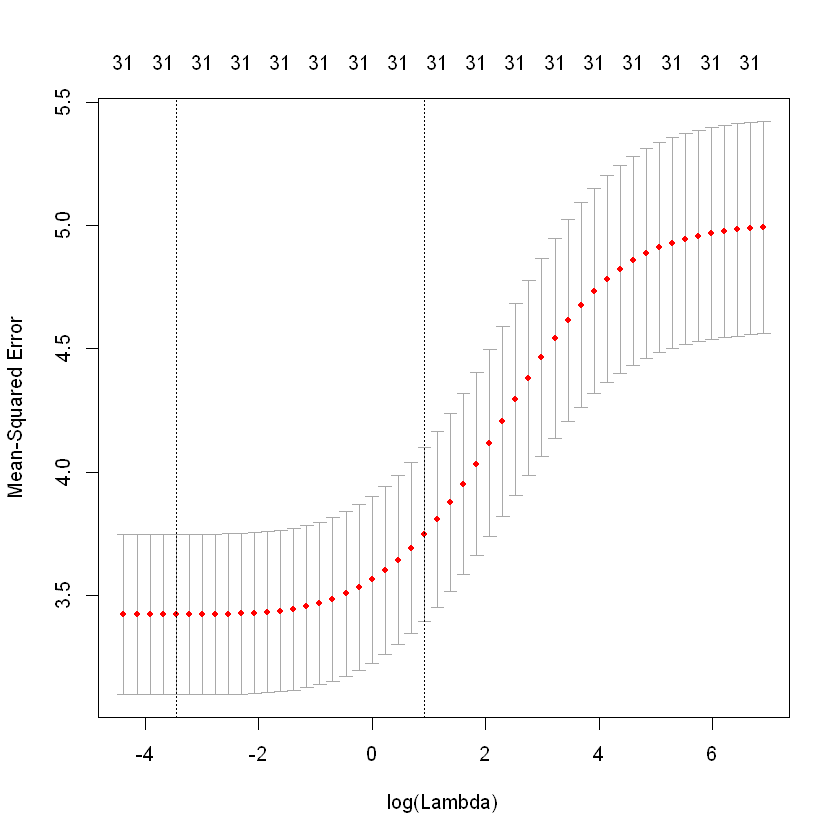

32 x 1 sparse Matrix of class "dgCMatrix"
                               1
(Intercept)         1.639664e+01
budget              1.932644e-08
TypeAction          .           
TypeAdventure       .           
TypeAnimation       .           
TypeComedy          .           
TypeCrime           .           
TypeDocumentary     .           
TypeDrama           .           
TypeFamily          .           
TypeFantasy         .           
TypeForeign        -1.387990e-01
TypeHistory         .           
TypeHorror          .           
TypeMusic           .           
TypeMystery         .           
TypeRomance         .           
TypeScienceFiction  .           
TypeThriller        .           
TypeWar             .           
TypeWestern         .           
year                .           
season2             .           
season3             .           
season4             .           
company1            1.339624e-02
company2            .           
company3            .           
c

[1] 0.01

[1] 2.393622

[1] 2.270786

[1] 2.145296

[1] 2.251529

[1] 2.249262

[1] 2.285681

[1] 2.312825

[1] 2.344426

[1] 2.224898

[1] 2.117245

[1] 2.240782

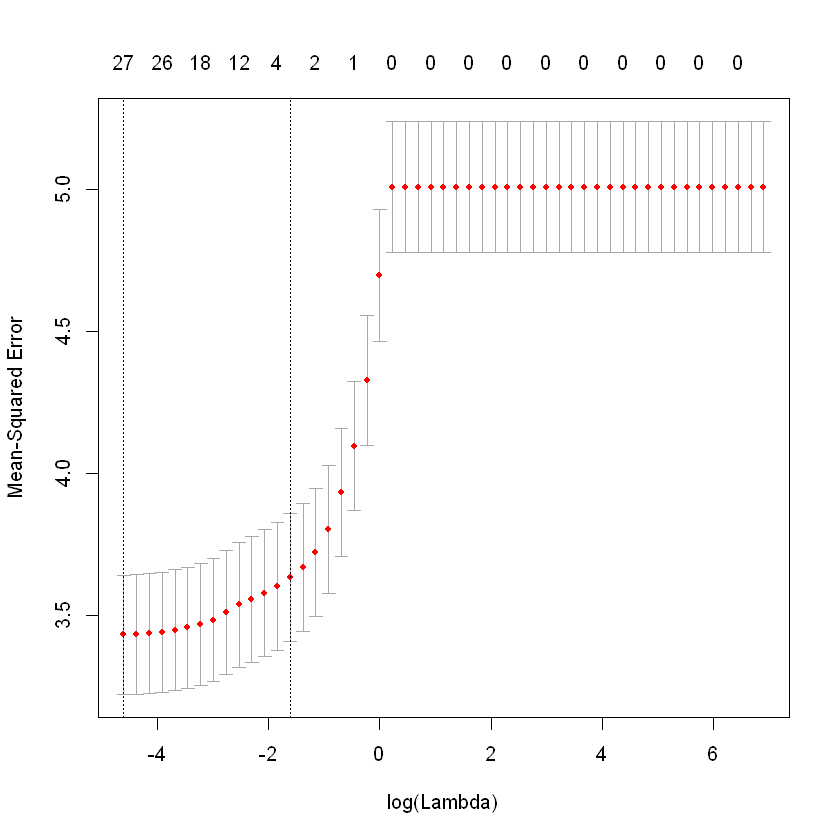

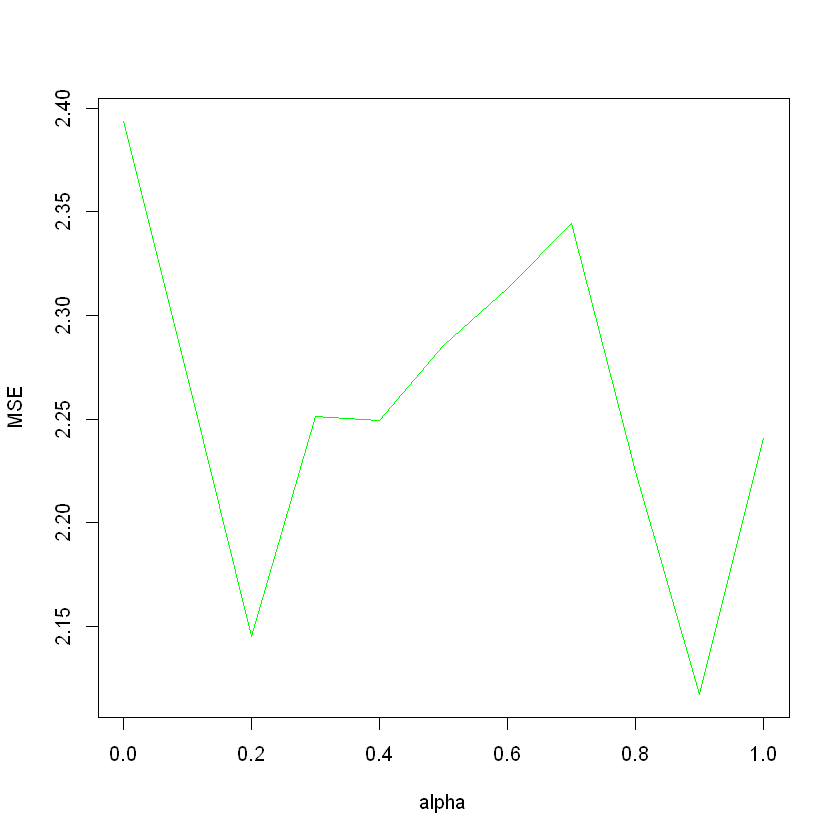

In [592]:
library(tidyverse)
library(caret)
library(leaps)
target_df$TypeAction <- as.numeric(target_df$TypeAction)
target_df$TypeAdventure  <- as.numeric(target_df$TypeAdventure )
#model_test[which (model_test$budget != 0),'budget'] <- log(model_test[which (model_test$budget != 0),'budget'])
model_test <- target_df
testing <- tesing_target_df
library(car)
library(glmnet)
modelfull <- lm(revenue ~ . + season*TypeAction + season*TypeAdventure + season*TypeAnimation + season*TypeComedy
        + season*TypeDocumentary + season*TypeDrama+ season*TypeFamily+ season*TypeFantasy + season*TypeHistory + season*TypeHorror + season*TypeMusic + season*TypeMystery + + season*TypeRomance +
        + season*TypeScienceFiction +
        + season*TypeWar +
        + season*TypeWestern
        ,data = model_test)
#outlier
#outlierTest(modelfull)
modelfull.final.fit <- update(modelfull, data = model_test[-c(1510,2761,3015,2732,2587,1722,1604,2430,2463,2882),])

# selection
'
library(MASS)
step.model <- stepAIC(modelfull.final.fit, direction = "both")
'
dummy_train <- model.matrix(revenue ~ ., model_test)

dummy_test <- model.matrix(revenue ~ ., testing)
# ridge regression
lambdas <- 10^seq(3, -2, by = -.1)
cv_fit_ridge <- cv.glmnet( dummy_train[,seq(2,ncol(dummy_train))],model_test$revenue,alpha = 0, lambda = lambdas,intercept = TRUE)
plot(cv_fit_ridge)
coef(cv_fit_ridge)
ridge_opt_lambda <- cv_fit_ridge$lambda.min
# lasso regression
cv_fit_lasso <- cv.glmnet( dummy_train[,seq(2,ncol(dummy_train))],model_test$revenue,alpha = 1, lambda = lambdas,intercept = TRUE)
plot(cv_fit_lasso)
coef(cv_fit_lasso)
lasso_opt_lambda <- cv_fit_lasso$lambda.min
lasso_opt_lambda
# ELASTIC NET
fit0 <- cv.glmnet( dummy_train[,seq(2,ncol(dummy_train))],model_test$revenue,alpha = 0.0, lambda = lambdas,intercept = TRUE)
fit1 <- cv.glmnet( dummy_train[,seq(2,ncol(dummy_train))],model_test$revenue,alpha = 0.1, lambda = lambdas,intercept = TRUE)
fit2 <- cv.glmnet( dummy_train[,seq(2,ncol(dummy_train))],model_test$revenue,alpha = 0.2, lambda = lambdas,intercept = TRUE)
fit3 <- cv.glmnet( dummy_train[,seq(2,ncol(dummy_train))],model_test$revenue,alpha = 0.3, lambda = lambdas,intercept = TRUE)
fit4 <- cv.glmnet( dummy_train[,seq(2,ncol(dummy_train))],model_test$revenue,alpha = 0.4, lambda = lambdas,intercept = TRUE)
fit5 <- cv.glmnet( dummy_train[,seq(2,ncol(dummy_train))],model_test$revenue,alpha = 0.5, lambda = lambdas,intercept = TRUE)
fit6 <- cv.glmnet( dummy_train[,seq(2,ncol(dummy_train))],model_test$revenue,alpha = 0.6, lambda = lambdas,intercept = TRUE)
fit7 <- cv.glmnet( dummy_train[,seq(2,ncol(dummy_train))],model_test$revenue,alpha = 0.7, lambda = lambdas,intercept = TRUE)
fit8 <- cv.glmnet( dummy_train[,seq(2,ncol(dummy_train))],model_test$revenue,alpha = 0.8, lambda = lambdas,intercept = TRUE)
fit9 <- cv.glmnet( dummy_train[,seq(2,ncol(dummy_train))],model_test$revenue,alpha = 0.9, lambda = lambdas,intercept = TRUE)
fit10 <- cv.glmnet( dummy_train[,seq(2,ncol(dummy_train))],model_test$revenue,alpha = 1, lambda = lambdas,intercept = TRUE)

x.test <-dummy_test[,seq(2,ncol(dummy_test))]

yhat0 <- predict(fit0, s=fit0$lambda.1se, newx=x.test)
yhat1 <- predict(fit1, s=fit1$lambda.1se, newx=x.test)
yhat2 <- predict(fit2, s=fit2$lambda.1se, newx=x.test)
yhat3 <- predict(fit3, s=fit3$lambda.1se, newx=x.test)
yhat4 <- predict(fit4, s=fit4$lambda.1se, newx=x.test)
yhat5 <- predict(fit5, s=fit5$lambda.1se, newx=x.test)
yhat6 <- predict(fit6, s=fit6$lambda.1se, newx=x.test)
yhat7 <- predict(fit7, s=fit7$lambda.1se, newx=x.test)
yhat8 <- predict(fit8, s=fit8$lambda.1se, newx=x.test)
yhat9 <- predict(fit9, s=fit9$lambda.1se, newx=x.test)
yhat10 <- predict(fit9, s=fit10$lambda.1se, newx=x.test)

mse0 <- mean((testing$revenue - yhat0)^2)
mse1 <- mean((testing$revenue - yhat1)^2)
mse2 <- mean((testing$revenue - yhat2)^2)
mse3 <- mean((testing$revenue - yhat3)^2)
mse4 <- mean((testing$revenue - yhat4)^2)
mse5 <- mean((testing$revenue - yhat5)^2)
mse6 <- mean((testing$revenue - yhat6)^2)
mse7 <- mean((testing$revenue - yhat7)^2)
mse8 <- mean((testing$revenue - yhat8)^2)
mse9 <- mean((testing$revenue - yhat9)^2)
mse10 <- mean((testing$revenue - yhat10)^2)

mse0
mse1
mse2
mse3
mse4
mse5
mse6
mse7
mse8
mse9
mse10

plot (y = c(mse0 ,mse1 ,mse2, mse3 ,mse4, mse5 ,mse6 ,mse7 ,mse8 ,mse9,mse10), x = seq(0.0,1.0,0.1),xlab = 'alpha', ylab = 'MSE',type="l", col="green")

In [593]:
test <- tesing_target_df
library(lmridge)
#test[which (test$budget != 0),'budget'] <- log(test[which (test$budget != 0),'budget'])
ncol(dummy_train)
ncol(dummy_test)
y_predicted <- predict(fit9, s = fit9$lambda.1se, newx = dummy_test[,seq(2,ncol(dummy_test))])
test.y    <- testing$revenue
y_predicted <- as.numeric(y_predicted)
length(test.y)
length(y_predicted)
SS.residual   <- sum((test.y - y_predicted)^2)
SS.total      <- sum((test.y - mean(test.y))^2)
regss <- sum((y_predicted - mean(y_predicted)) ^ 2)
sum((test.y - mean(test.y))^2)
sum((test.y - y_predicted)^2)
regss
print( 1.0 - SS.residual/SS.total)

[1] 32

[1] 32

[1] 376

[1] 376

[1] 1335.1

[1] 796.0842

[1] 514.5328

[1] 0.4037268


`geom_smooth()` using formula 'y ~ x'


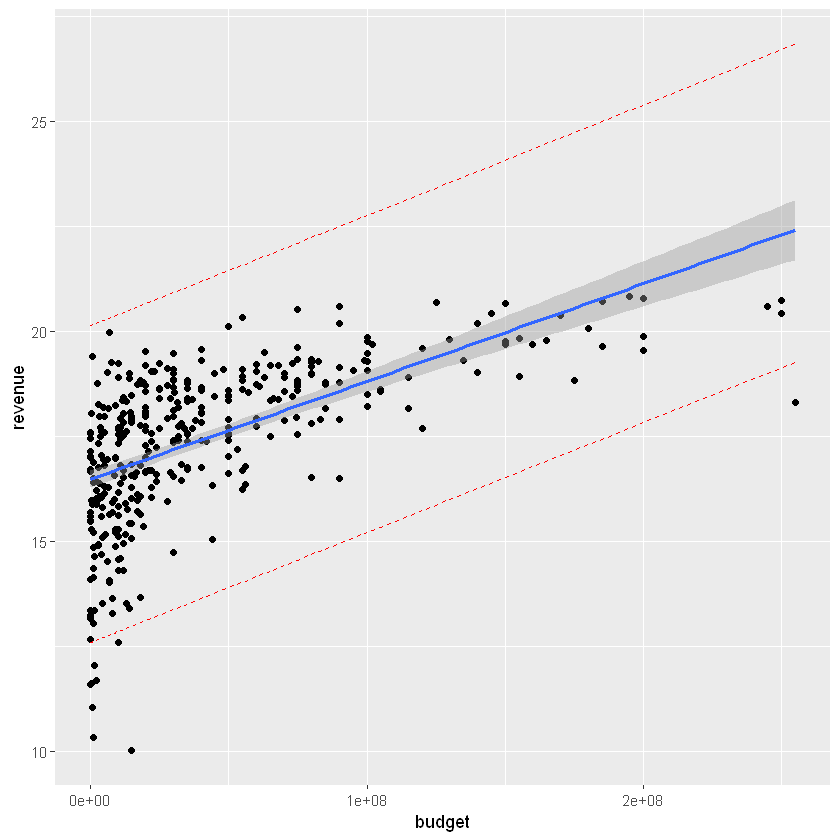

In [594]:
modelb <- lm(revenue ~ budget
        ,data = target_df) 
# 1. Add predictions 
pred.int <- predict(modelb, interval = "prediction", newdata = tesing_target_df)
mydata <- cbind(tesing_target_df, pred.int)
# 2. Regression line + confidence intervals
library("ggplot2")
p <- ggplot(mydata, aes(budget, revenue)) +
  geom_point() +
  stat_smooth(method = lm)
# 3. Add prediction intervals
p + geom_line(aes(y = lwr), color = "red", linetype = "dashed")+
    geom_line(aes(y = upr), color = "red", linetype = "dashed")


In [595]:
test.pred.budget <- predict(modelb,newdata=tesing_target_df)
test.y    <- tesing_target_df$revenue
SS.residual   <- sum((test.y - test.pred.budget)^2)
SS.total      <- sum((test.y - mean(test.y))^2)
print( 1.0 - SS.residual/SS.total)

[1] 0.3423604


[1] "\nfor ( i in loop){\n    ames_bag1 <- bagging(\n      formula = revenue~ .,\n      data = TRAIN_FULL,\n      nbagg = i,\n      coob = TRUE,\n      control = rpart.control(minsplit = 2, cp = 0))\n    Y_mse[i-9]<-ames_bag1$err\n}\n"

[1] "\nctrl <- trainControl(method = \"cv\", number = 10)\nbagged_cv <- train(\n  revenue~ .,\n  data = TRAIN_FULL,\n  method = \"treebag\", \n  trControl = ctrl,\n  importance = TRUE\n)\npred <- predict(object = bagged_cv,newdata = TREE_TESTING_FULL)\nSS.residual   <- sum((test.y - pred)^2)\nSS.total      <- sum((test.y - mean_y)^2)\nregss <- 1 - SS.residual/SS.total\nprint(regss)\nprint(bagged_cv)\n"


Call:
 randomForest(formula = revenue ~ ., data = TRAIN_FULL, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 2.146528
                    % Var explained: 43.11

Using 354 trees...



[1] 0.5565154


Using 343 trees...



[1] 0.5652694


Using 265 trees...



[1] 0.5601631


Using 276 trees...



[1] 0.5694343


Using 351 trees...



[1] 0.5581722


Using 326 trees...



[1] 0.5629977


Using 264 trees...



[1] 0.5621471


Using 289 trees...



[1] 0.5637654


Using 296 trees...



[1] 0.5655858


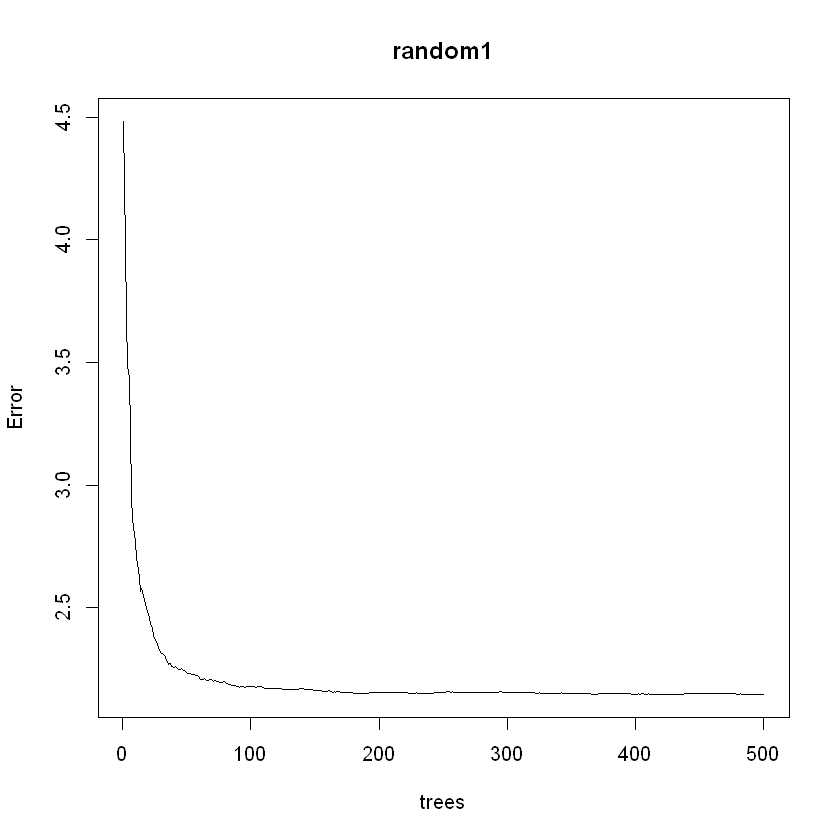

In [673]:
# decision Tree

set.seed(123)

library(rpart)
TREE_TRAIN <- model_test[-which(model_test$budget < 50),]
TREE_DUMMY <- dummy_train[-which(model_test$budget < 50),]
TREE_DUMMY<-TREE_DUMMY[,2:ncol(TREE_DUMMY)]
TRAIN_FULL <- cbind(as.data.frame(TREE_DUMMY),TREE_TRAIN['revenue'])
TREE_TEST <- testing[-which(testing$budget < 50),]
TREE_TESTING_DUMMY<- dummy_test[-which(testing$budget < 50),]
TREE_TESTING_DUMMY<-TREE_TESTING_DUMMY[,2:ncol(TREE_TESTING_DUMMY)]
TREE_TESTING_FULL<- cbind(as.data.frame(TREE_TESTING_DUMMY),TREE_TEST['revenue'])

cats_rpart_model <- rpart(revenue~ ., data = TRAIN_FULL, method = 'anova')
cats_rpart_pred <- predict(cats_rpart_model, TREE_TESTING_FULL,type = 'vector')


# Modeling packages
library(caret)       # for general model fitting
library(rpart)       # for fitting decision trees
library(ipred)       # for fitting bagged decision trees
set.seed(123)

loop <- seq(10,20)
Y_mse <- rep(0,length(loop))
'
for ( i in loop){
    ames_bag1 <- bagging(
      formula = revenue~ .,
      data = TRAIN_FULL,
      nbagg = i,
      coob = TRUE,
      control = rpart.control(minsplit = 2, cp = 0))
    Y_mse[i-9]<-ames_bag1$err
}
'
loop2 <- seq(10,20)
Y_mse2 <- rep(0,length(loop))

test.y    <- TREE_TEST$revenue
mean_y <- mean(test.y)

'
ctrl <- trainControl(method = "cv", number = 10)
bagged_cv <- train(
  revenue~ .,
  data = TRAIN_FULL,
  method = "treebag", 
  trControl = ctrl,
  importance = TRUE
)
pred <- predict(object = bagged_cv,newdata = TREE_TESTING_FULL)
SS.residual   <- sum((test.y - pred)^2)
SS.total      <- sum((test.y - mean_y)^2)
regss <- 1 - SS.residual/SS.total
print(regss)
print(bagged_cv)
'
library(randomForest)
#random1 <- randomForest(revenue~ ., data = TRAIN_FULL, importance = TRUE)
pred <- predict(object = random1,newdata = TREE_TESTING_FULL)
random1
plot(random1)

library(gbm)
cv = c(4,6,8,10,12,14,16,18,20)
for (i in cv){
    gbm_algorithm <- gbm(revenue ~ ., data = TRAIN_FULL,distribution = "gaussian", cv.folds = i, n.trees = 500)
    plot(gbm_algorithm)
    pred <- predict(object = gbm_algorithm,newdata = TREE_TESTING_FULL)
    y_predicted <- as.numeric(pred)
    SS.residual   <- sum((test.y - y_predicted)^2)
    SS.total      <- sum((test.y - mean(test.y))^2)
    regss <- sum((y_predicted - mean(y_predicted)) ^ 2)
    print( 1.0 - SS.residual/SS.total)
}

In [672]:
test.y    <- TREE_TEST$revenue
y_predicted <- as.numeric(pred)
SS.residual   <- sum((test.y - y_predicted)^2)
SS.total      <- sum((test.y - mean(test.y))^2)
regss <- sum((y_predicted - mean(y_predicted)) ^ 2)
print( 1.0 - SS.residual/SS.total)

[1] 0.5505955
